# Mid - term Capstone

In this project I will be using the Telco Customer Churn dataset provided by IBM to study the customer behavior in order to answer the following three questions:

- Which features influence if the cutomer will leave?
- What are the most important of the latter features?
- Which clients have the highest chance of leaving?

This dataset has 7043 samples and 21 features, the features includes demographic information about the client like gender, age range, and if they have partners and dependents,  the services that they have signed up for, how long they’ve been a customer, payment method, paperless billing, monthly charges, total charges, and churn which is the feature that we will want to predict that tells us which customers have left within the last month.

The project has been divided into:

    - Loading necessary libraries
    - Reading and cleaning the Data
    - Analysis
    - Graphical Analysis
    - Modelling
    - Final model socres

### Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
current_state = np.random.get_state()
np.random.set_state(current_state)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from scipy import stats
from scipy.stats import ttest_ind
import time 
import random

from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading and cleaning the data

Reading, loading the file and specifying empty values as NA:

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=[" "])

In [3]:
print('Shape:', df.shape)
display(df.head())

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can read better the first five rows if we transpose them like this:

In [4]:
print('Transposed')
df.head().T

Transposed


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


We now change the Senior Citizen feature from integer to cagecorical and delete the Customer Id column since it's not relevant to our prediction

In [5]:
df['SeniorCitizen'] = pd.Categorical(df['SeniorCitizen']) #Changing from int to categorical
df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [6]:
del df["customerID"] # Deleting the custumerID column

We drop all NA values and check if there are any NA values left:

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Analysis

We will split the dataset into numeric and objects to facilitate the analysis:

In [9]:
numerics = ['float64', 'int64']
numeric_df = df.select_dtypes(include=numerics)
objects_df = df.select_dtypes(exclude=numerics)

The following will give us an idea of how the data looks like helping us understand better our features:

In [10]:
numeric_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
objects_df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [12]:
df.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

## Graphical Analysis

We will focus in three aspects:

- Numerical
- Numerical vs Categorical
- Categorical

### Numerical

We will look into the numerical features, how they are distributed, how they relate with each other and how they can help us to predict the churn feature.

To see the distribution we will use the boxplot and histogram plots:

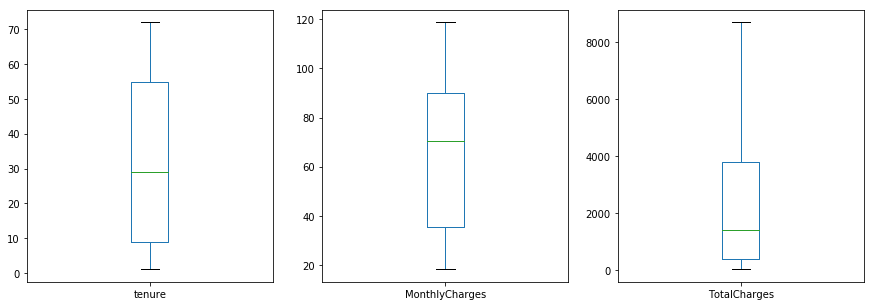

In [13]:
# Box plots
numeric_df.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot()
plt.show()

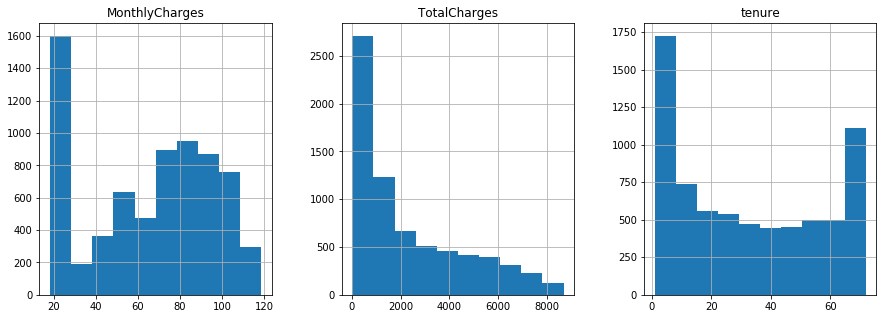

In [14]:
# Histogram plots
numeric_df.hist(layout=(1,3), figsize=(15,5))
plt.plot()
plt.show()

- The box plot and histogram shows us that our numerical features are not normally distributed.
- With a pair grid graph we can see how these feature relate to the feature we are trying to predict, churn.

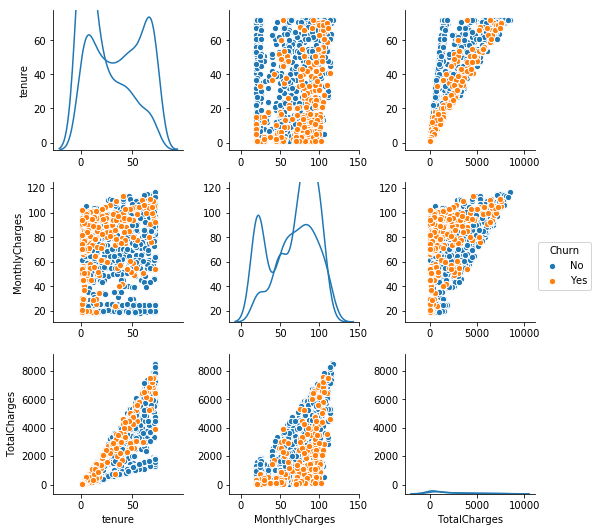

In [15]:
numeric_df = pd.concat([numeric_df, df["Churn"]], axis=1) #Add the 'Churn' variable to the numeric dataset
g = sns.PairGrid(numeric_df.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

In [16]:
numeric_df.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
Churn              object
dtype: object

In [17]:
numeric_principal = numeric_df.drop(columns=["TotalCharges"])

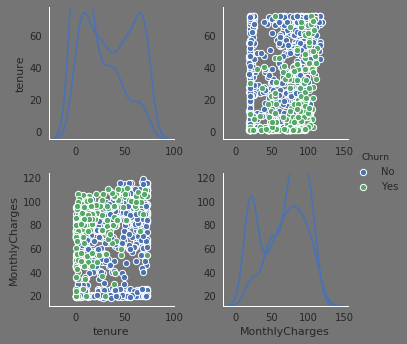

In [18]:
plt.figure(figsize = (12,8))
sns.set(rc={'axes.facecolor':'#757575ff', 'figure.facecolor':'#757575ff', 'axes.grid': False, 'axes.linewidth': 1 }, font_scale=1)
g = sns.PairGrid(numeric_principal.sample(n=800), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

- Tenure and Monthly Charges look like good features that can help us in our prediction.
- W will use the violin plot to decide the bins that we will be using.

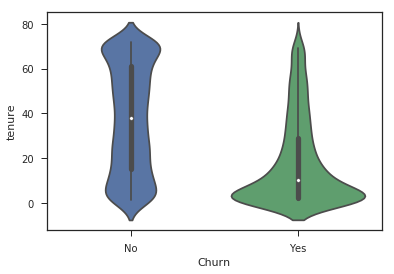

In [19]:
sns.set_style("white")
sns.set_style("ticks")

sns.violinplot(x="Churn", y="tenure", data=numeric_df)

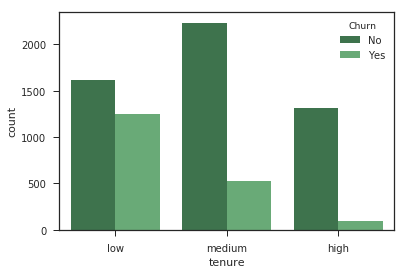

In [20]:
tenure_bins=pd.cut(numeric_df["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_df, palette="Greens_d")

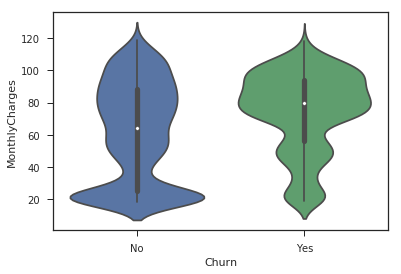

In [21]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_df)

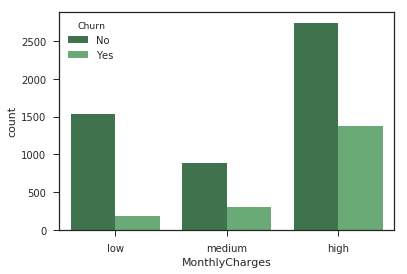

In [22]:
MonthlyCharges_bins=pd.cut(numeric_df["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_df, palette="Greens_d");

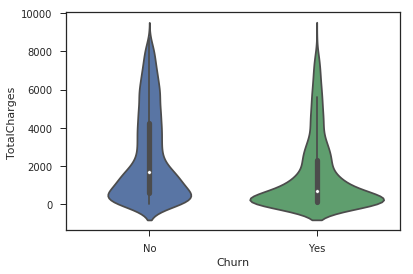

In [23]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_df)

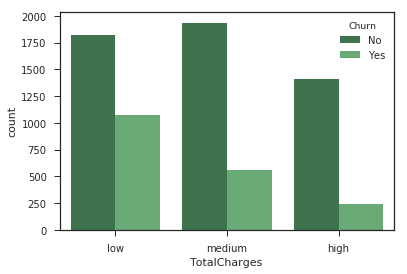

In [24]:
TotalCharges_bins=pd.cut(numeric_df["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_df, palette="Greens_d");

- We divided the three numerical feaures in 3 bins according to the violin plot with the purpose of separatingto  distinguish the low churn rate areas from the high churn rate areas.
- We can see from the count plots how the distribution is different in each bin.
- We will save the bins in a new data frame

In [25]:
bins = pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

### Numeric vs Categorical Plots

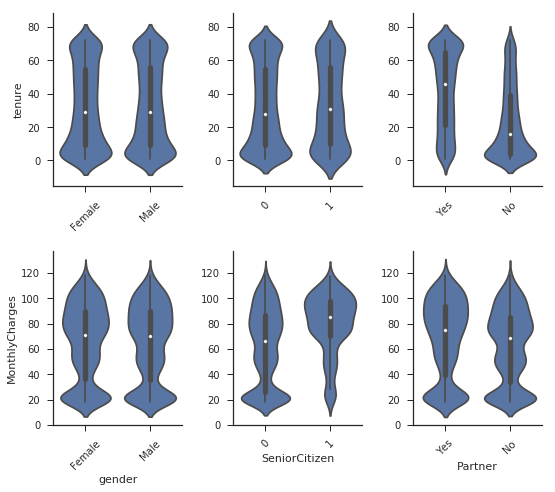

In [26]:
g = sns.PairGrid(df, x_vars=objects_df.columns[0:3].values,
    y_vars=numeric_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

g.fig.tight_layout()

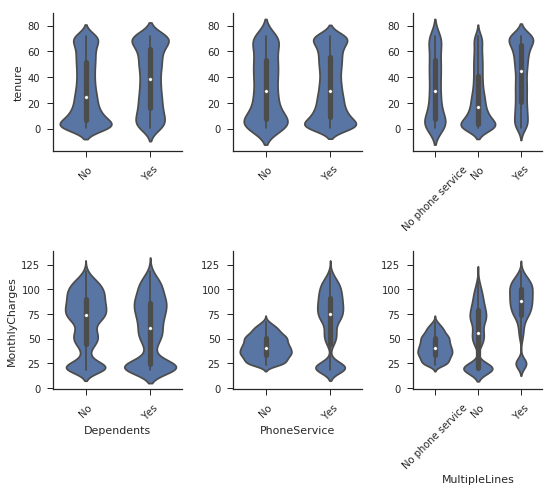

In [27]:
g2 = sns.PairGrid(df, x_vars=objects_df.columns[3:6].values,
    y_vars=numeric_df.columns[0:2].values, aspect=.75, size=3.5)
g2.map(sns.violinplot)

for ax in g2.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

g2.fig.tight_layout()

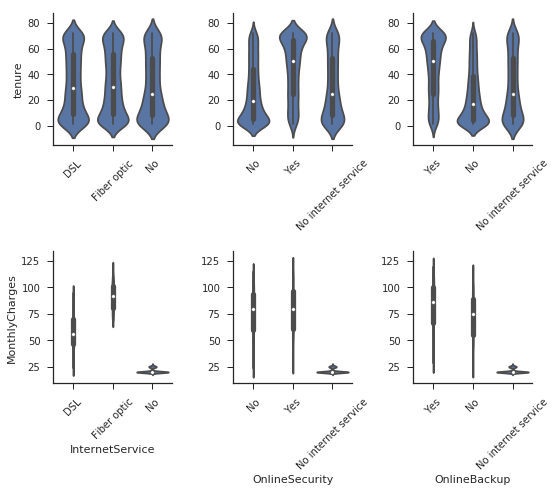

In [28]:
g3 = sns.PairGrid(df, x_vars=objects_df.columns[6:9].values,
    y_vars=numeric_df.columns[0:2].values, aspect=.75, size=3.5)
g3.map(sns.violinplot);

for ax in g3.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

g3.fig.tight_layout()

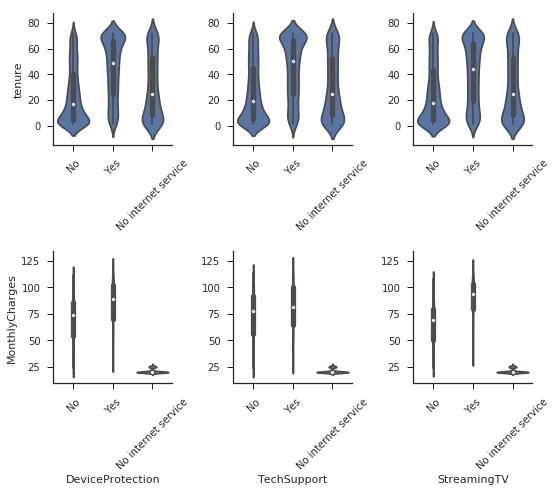

In [29]:
g4 = sns.PairGrid(df, x_vars=objects_df.columns[9:12].values,
    y_vars=numeric_df.columns[0:2].values, aspect=.75, size=3.5)
g4.map(sns.violinplot);

for ax in g4.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

g4.fig.tight_layout()

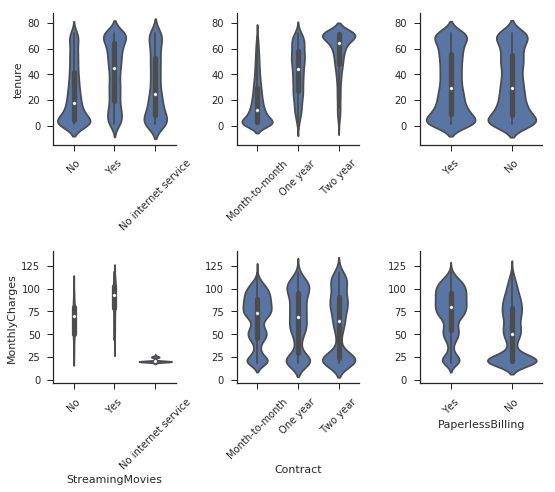

In [30]:
g5 = sns.PairGrid(df, x_vars=objects_df.columns[12:15].values,
    y_vars=numeric_df.columns[0:2].values, aspect=.75, size=3.5)
g5.map(sns.violinplot);

for ax in g5.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

g5.fig.tight_layout()

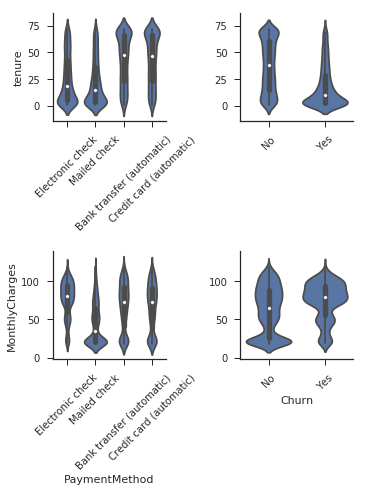

In [31]:
g6= sns.PairGrid(df, x_vars=objects_df.columns[15:17].values,
    y_vars=numeric_df.columns[0:2].values, aspect=.75, size=3.5)
g6.map(sns.violinplot);

for ax in g6.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

g6.fig.tight_layout()

These plots show us how each of the categorical variables relate to the numerical variables. 

We can get to some conclusion regarding the latter PairGrid:

- Clients whith a Payment method that is electronic or mailed check have a lower tenure.

- We can see that the features that do not influence the tenure or Monthly Payment are gender.

### Categorical plots

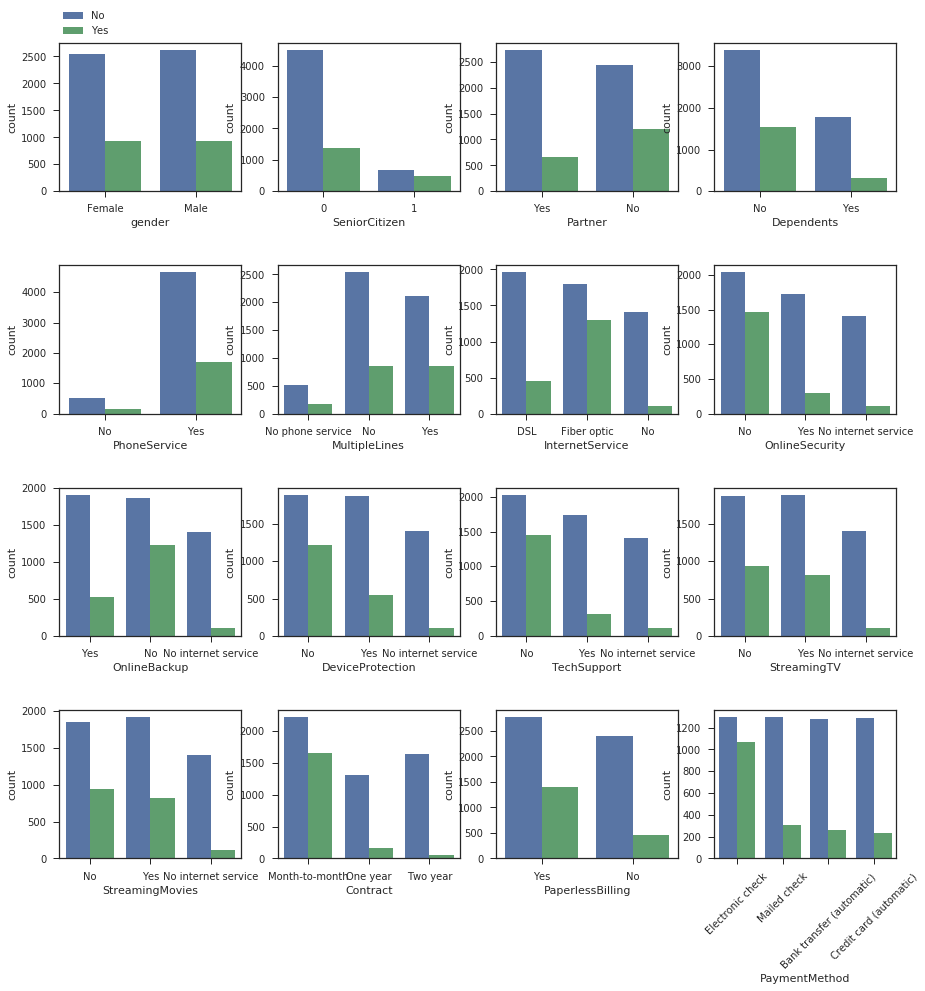

In [32]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_df.iloc[:,i], hue=objects_df["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [33]:
objects_df.loc[:, "Churn_yes"] = objects_df.Churn.apply(lambda r: 1 if r == "Yes" else 0)

/home/mache/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mache/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(array([ 0.5,  1.5,  2.5]), <a list of 3 Text yticklabel objects>)

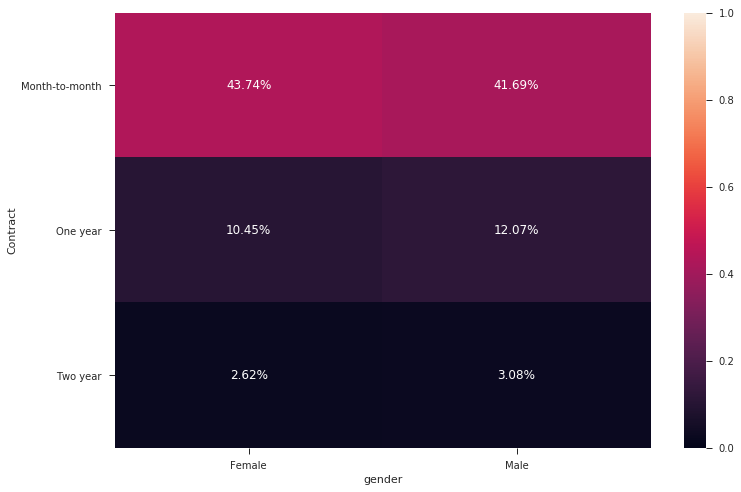

In [34]:
contract = objects_df.pivot_table(values= "Churn_yes" , columns="gender", index='Contract')
plt.figure(figsize = (12,8))
#sns.set(rc={'figure.facecolor':'#757575ff'}, font_scale=1.5)
sns.heatmap(contract, annot=True, fmt="0.2%", vmin=0, vmax=1)
plt.yticks(rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text yticklabel objects>)

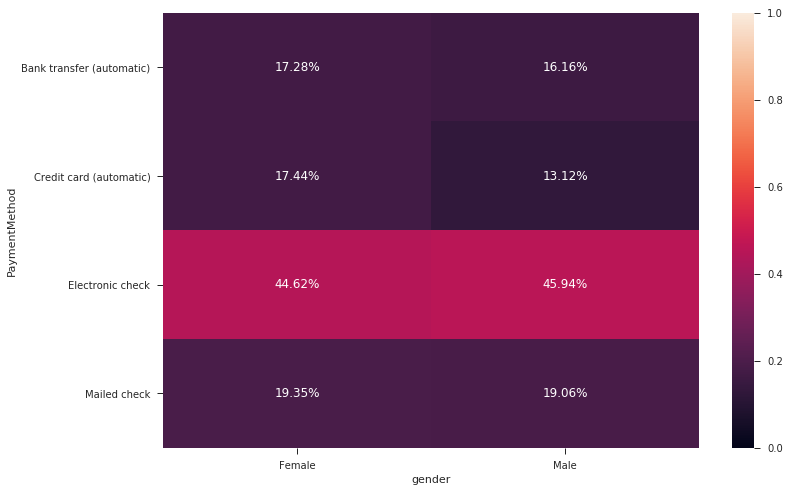

In [35]:
payment_method = objects_df.pivot_table(values= "Churn_yes" , columns="gender", index='PaymentMethod')
plt.figure(figsize = (12,8))
#sns.set(rc={'figure.facecolor':'#757575ff'}, font_scale=1.5)
sns.heatmap(payment_method, annot=True, fmt="0.2%", vmin=0, vmax=1)
plt.yticks(rotation=0)

From the above plots we can see which features are more important to us, and we can regard some conclusions:

- Having Month-to-month contract is a strong indicator if the client might leave soon
- If the client has an Electronic check payment method this is also an indicator that the client might be leaving soon
- On the other hand being a senior citizen good indicature of the client staying

In [36]:
objects_df = objects_df.drop(columns="Churn_yes")

In [37]:
objects_df.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
Churn                 object
dtype: object

# Modelling

We will be testing our dataset with eight different moels:

- Logistic Regression (Classification L2)
- Random Forest Classification
- Decision Tree Classification
- K-nearest neighbors Classification
- Ridge Classification
- Lasso Classification
- C-Suppor Vector Classification (SVC)
- Gradient Boost Classification

This section is divided in the following stages:

- Input, output and holdout to prepare the dataset for training and testing
- Training and testing applying GridSearchCV
- Training and testing applying PCA
- Training and testing applying SelecyKbest

In each phase of training and testing we will be creating a confusion matrix, calculating cross validation scores to determine the accuracy for the training and testing data sets.

## Input, output and Holdout

In [38]:
data=pd.concat([bins,objects_df],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors

In [39]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features]
Y = dummy["Churn_Yes"]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [40]:
Y_train.head()

3974    0
5353    0
3527    1
738     0
3474    0
Name: Churn_Yes, dtype: uint8

## Training and testing with GridSearchCV

### Logistic Regression (Classification L2)

In [41]:
log_reg_model = linear_model.LogisticRegression(penalty = 'l2')

In [42]:
# Define the parameter values that should be searched
C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [43]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C)
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [44]:
# instantiate and fit the grid
grid = GridSearchCV(log_reg_model, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
# Logistic Regression
start = time.time()
grid.fit(X_train, Y_train)
log_reg_pred = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Runtime 1.94


In [46]:
# View the complete results
grid.grid_scores_

/home/mache/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.77067, std: 0.00854, params: {'C': 0.001},
 mean: 0.80000, std: 0.00819, params: {'C': 0.01},
 mean: 0.80071, std: 0.00741, params: {'C': 0.1},
 mean: 0.80018, std: 0.00837, params: {'C': 1},
 mean: 0.80000, std: 0.00862, params: {'C': 10},
 mean: 0.80000, std: 0.00862, params: {'C': 100},
 mean: 0.80000, std: 0.00862, params: {'C': 1000}]

In [47]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.800711111111
{'C': 0.1}


In [48]:
log_reg_model = linear_model.LogisticRegression(penalty = 'l2', C=0.1)
log_reg_model.fit(X_train, Y_train)
log_reg_pred = log_reg_model.predict(X_train)

             precision    recall  f1-score   support

   Churn_No       0.84      0.91      0.87      4146
  Churn_Yes       0.66      0.51      0.58      1479

avg / total       0.79      0.80      0.79      5625



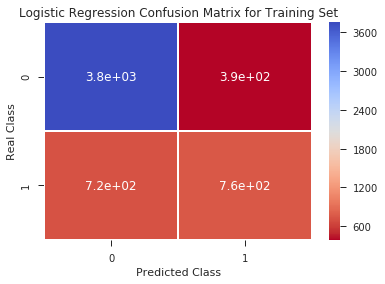

Cross Validation Accuracy Scores: 0.801(+/- 0.01)
Cross Validation Accuracy Scores - Test Set: 0.790(+/- 0.06)


In [49]:
# Printing classification report
print(classification_report(Y_train, log_reg_pred, target_names=['Churn_No', 'Churn_Yes']))

# Building confusion matrix
conf_matrix_train_logR = confusion_matrix(Y_train, log_reg_pred)

#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_train_logR,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('Logistic Regression Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_logR = cross_val_score(log_reg_model, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_logR.mean(), scores_logR.std()*2))

scores_logRTest = cross_val_score(log_reg_model, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_logRTest.mean(), scores_logRTest.std()*2))

We used GridSearCV to find the best parameters of C, and fit the model with our training set. We generated great accuracy scores for the training and testing sets, with an 80 % and 79 % accuracy. We can see that the the precission in predicting people staying in the Telco is 84 % which is high, however, the perfromance for predicting if they are leaving wasn't that satisffactory, which is reflected in the F1 score, that calculates the harmoninc mean of precision and recall.

### Random Forest

In [50]:
rfc = ensemble.RandomForestClassifier()

In [51]:
# Define the parameter values that should be searched
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 4, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [52]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [1], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [53]:
# Random Forest Classifier: instantiate and fit the grid
start = time.time()
grid = GridSearchCV(rfc, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_rfc = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Runtime 42.88


[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:   42.8s finished


In [54]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.789333333333
{'bootstrap': False, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1}


In [55]:
rfc = ensemble.RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=1)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_train)


             precision    recall  f1-score   support

   Churn_No       0.84      0.90      0.87      4146
  Churn_Yes       0.65      0.51      0.57      1479

avg / total       0.79      0.80      0.79      5625



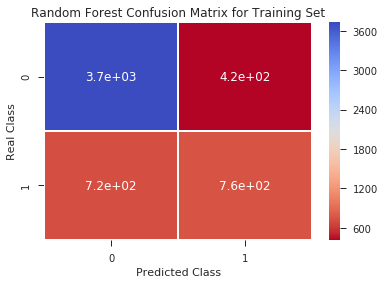

Cross Validation Accuracy Scores: 0.780(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.762(+/- 0.06)


In [56]:
# Print classification report
print(classification_report(Y_train, Y_pred_rfc, target_names=['Churn_No', 'Churn_Yes']))

# Building confusion matrix
conf_matrix_rfc = confusion_matrix(Y_train, Y_pred_rfc)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_rfc, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Random Forest Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rfc = cross_val_score(rfc, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc.mean(), scores_rfc.std()*2))

scores_rfcTest = cross_val_score(rfc, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_rfcTest.mean(), scores_rfcTest.std()*2))

We used GridSearCV to find the best parameters of n-estimators, max-features, max-depth, minimum samples split, minumum samples leaf and bootstrap, and fit the model with our training set. We generated good accuracy scores for the training and testing sets, with an 78 % and 77 % accuracy. We can see that the the precission in predicting people staying in the Telco is 85 % which is high, however, the perfromance for predicting if they are leaving wasn't that satisffactory, which is reflected in the F1 score, that calculates the harmoninc mean of precision and recall.

### Decision Tree

In [57]:
clf = DecisionTreeClassifier()

In [58]:
# Define the parameter values that should be searched
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2),'criterion' : ['gini', 'entropy']} 

In [59]:
# instantiate and fit the grid
start = time.time()
grid = GridSearchCV(clf, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_clf = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
Runtime 80.66


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  1.3min finished


In [60]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.794311111111
{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 50}


In [61]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=50)
clf.fit(X_train, Y_train)
Y_pred_clf = clf.predict(X_train)

             precision    recall  f1-score   support

   Churn_No       0.85      0.91      0.88      4146
  Churn_Yes       0.67      0.54      0.60      1479

avg / total       0.80      0.81      0.80      5625



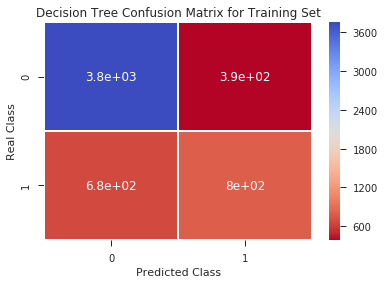

Cross Validation Accuracy Scores: 0.794(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.770(+/- 0.04)


In [62]:
# Print classification report
print(classification_report(Y_train, Y_pred_clf, target_names=['Churn_No', 'Churn_Yes']))

# Building confusion matrix
conf_matrix_clf = confusion_matrix(Y_train, Y_pred_clf)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_clf, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Decision Tree Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_clf = cross_val_score(clf, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_clf.mean(), scores_clf.std()*2))

scores_clfTest = cross_val_score(clf, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_clfTest.mean(), scores_clfTest.std()*2))

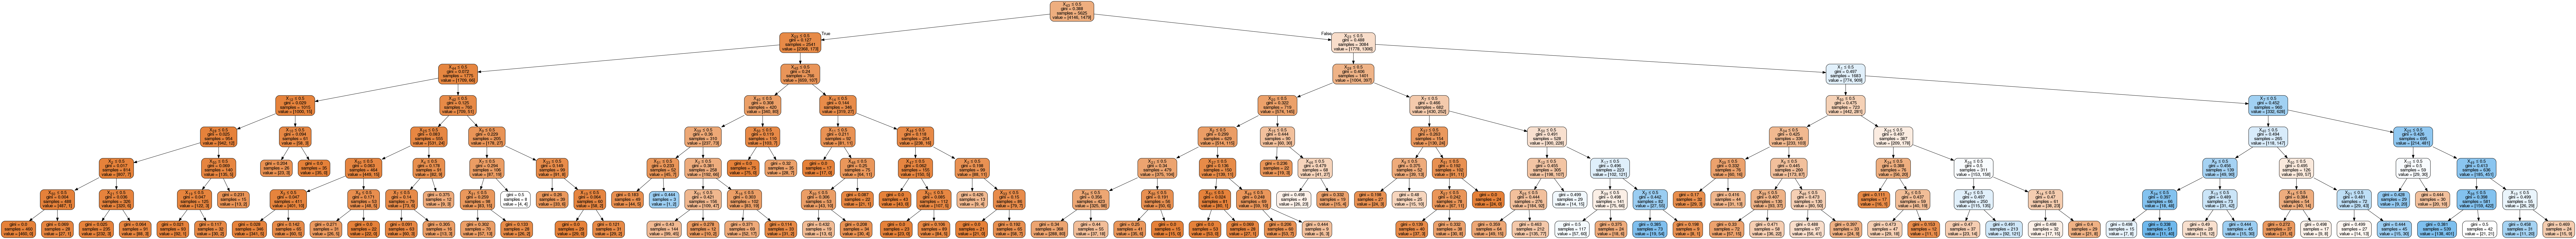

In [63]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

We used GridSearCV to find the best parameters of minimum samples split, max depth and criterion, and fit the model with our training set. We generated good accuracy scores for the training and testing sets, with an 79 % and 77 % accuracy. We can see that the the precission in predicting people staying in the Telco is 85 % which is high, however, the perfromance for predicting if they are leaving wasn't that satisffactory, but slightly better than the two latter model's performance, which is reflected in the F1 score, that calculates the harmoninc mean of precision and recall.

### KNN

In [64]:
knn_model = KNeighborsClassifier()

In [65]:
# Define the parameter values that should be searched
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

In [66]:
# KNN Classifier
start = time.time()
grid = GridSearchCV(knn_model, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_knn = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.5min finished


Runtime 214.19


In [67]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.776177777778
{'n_neighbors': 9}


In [68]:
knn_model = KNeighborsClassifier(n_neighbors=24)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_train)

             precision    recall  f1-score   support

   Churn_No       0.85      0.91      0.88      4146
  Churn_Yes       0.67      0.54      0.60      1479

avg / total       0.80      0.81      0.80      5625



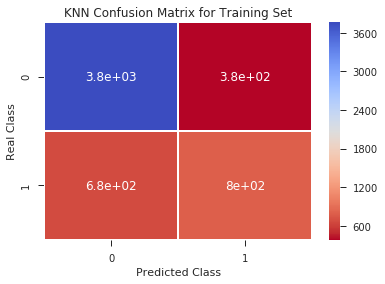

Cross Validation Accuracy Scores: 0.793(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.790(+/- 0.05)


In [69]:
# Print classification report
print(classification_report(Y_train, Y_pred_knn, target_names=['Churn_No', 'Churn_Yes']))

# Building confusion matrix
conf_matrix_knn = confusion_matrix(Y_train, Y_pred_knn)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_knn, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('KNN Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_knn = cross_val_score(knn_model, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_knn.mean(), scores_knn.std()*2))

scores_knnTest = cross_val_score(knn_model, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_knnTest.mean(), scores_knnTest.std()*2))

We used GridSearCV to find the best parameters of n-neighbors and fit the model with our training set. We generated good accuracy scores for the training and testing sets, with an 79 % and 79 % accuracy. We can see that the the precission in predicting people staying in the Telco is 85 % which is high, however, the perfromance for predicting if they are leaving wasn't that satisffactory, but slightly better than the first two latter model's performance, which is reflected in the F1 score, that calculates the harmoninc mean of precision and recall.

### Ridge

In [70]:
from sklearn.linear_model import RidgeClassifier
rclass = RidgeClassifier()

In [71]:
knn_model = KNeighborsClassifier()

In [72]:
# Define the parameter values that should be searched
param_grid = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}


In [73]:
# Ridge Classifier
start = time.time()
grid = GridSearchCV(rclass, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_rclass = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 13 candidates, totalling 130 fits
Runtime 1.45


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.4s finished


In [74]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.799644444444
{'alpha': 25}


In [75]:
rclass = RidgeClassifier(alpha=25)
rclass.fit(X_train, Y_train)
Y_pred_rclass = rclass.predict(X_train)

             precision    recall  f1-score   support

   Churn_No       0.83      0.91      0.87      4146
  Churn_Yes       0.67      0.49      0.57      1479

avg / total       0.79      0.80      0.79      5625



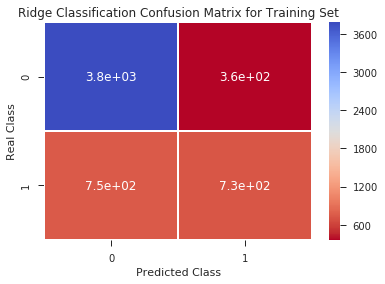

Cross Validation Accuracy Scores: 0.800(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.789(+/- 0.05)


In [76]:
# Print classification report
print(classification_report(Y_train, Y_pred_rclass, target_names=['Churn_No', 'Churn_Yes']))

# Building confusion matrix
conf_matrix_rclass = confusion_matrix(Y_train, Y_pred_rclass)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_rclass, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Ridge Classification Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rclass = cross_val_score(rclass, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rclass.mean(), scores_rclass.std()*2))

scores_rclassTest = cross_val_score(rclass, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_rclassTest.mean(), scores_rclassTest.std()*2))

We used GridSearCV to find the best parameters of alpha and fit the model with our training set. We generated good accuracy scores for the training and testing sets, with an 80 % and 79 % accuracy. We can see that the the precission in predicting people staying in the Telco is 83 % which is high, however, the perfromance for predicting if they are leaving wasn't that satisffactory, which is reflected in the F1 score, that calculates the harmoninc mean of precision and recall.

### Lasso Classification

In [77]:
lasso_model = linear_model.LogisticRegression(penalty = 'l1')

In [78]:
# Define the parameter values that should be searched
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [79]:
# Lasso Classifier
start = time.time()
grid = GridSearchCV(lasso_model, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_lasso_model = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Runtime 8.78


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    8.7s finished


In [80]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8032
{'C': 0.1}


In [81]:
lasso_model = linear_model.LogisticRegression(penalty = 'l1', C=0.1)
lasso_model.fit(X_train, Y_train)
Y_pred_lasso_model = lasso_model.predict(X_train)

             precision    recall  f1-score   support

   Churn_No       0.84      0.91      0.87      4146
  Churn_Yes       0.66      0.51      0.58      1479

avg / total       0.79      0.80      0.79      5625



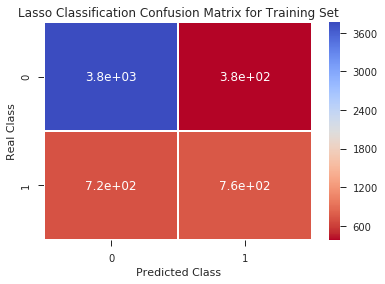

Cross Validation Accuracy Scores: 0.803(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.789(+/- 0.05)


In [82]:
# Print classification report
print(classification_report(Y_train, Y_pred_lasso_model, target_names=['Churn_No', 'Churn_Yes']))

# Building confusion matrix
conf_matrix_lasso = confusion_matrix(Y_train, Y_pred_lasso_model)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_lasso, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Lasso Classification Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_lasso = cross_val_score(lasso_model, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_lasso.mean(), scores_lasso.std()*2))

scores_LassoTest = cross_val_score(lasso_model, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_LassoTest.mean(), scores_LassoTest.std()*2))

We used GridSearCV to find the best parameters of C and fit the model with our training set. We generated good accuracy scores for the training and testing sets, with an 80 % and 79 % accuracy. We can see that the the precission in predicting people staying in the Telco is 84 % which is high, however, the perfromance for predicting if they are leaving wasn't that satisffactory, which is reflected in the F1 score, that calculates the harmoninc mean of precision and recall.

### SVC Classifier

In [83]:
svc_model = svm.SVC(kernel = 'rbf')

In [84]:
# Define the parameter values that should be searched
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [85]:
# SVC Classifier
start = time.time()
grid = GridSearchCV(svc_model, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_svc_model = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  5.4min finished


Runtime 327.75


In [86]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.797866666667
{'C': 10}


In [87]:
svc_model = svm.SVC(kernel = 'rbf', C=10)
svc_model.fit(X_train, Y_train)
Y_pred_svc_model = svc_model.predict(X_train)

             precision    recall  f1-score   support

   Churn_No       0.83      0.92      0.88      4146
  Churn_Yes       0.69      0.49      0.57      1479

avg / total       0.80      0.81      0.80      5625



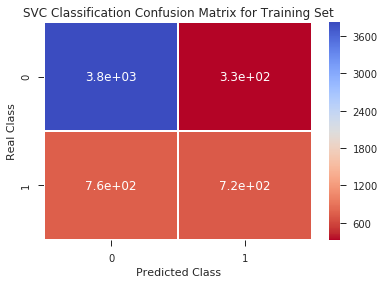

Cross Validation Accuracy Scores: 0.798(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.783(+/- 0.05)


In [88]:
# Print classification report
print(classification_report(Y_train, Y_pred_svc_model, target_names=['Churn_No', 'Churn_Yes']))

# Building confusion matrix
conf_matrix_svc = confusion_matrix(Y_train, Y_pred_svc_model)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_svc, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('SVC Classification Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_svc_model = cross_val_score(svc_model, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_svc_model.mean(), scores_svc_model.std()*2))

scores_svc_modelTest = cross_val_score(svc_model, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_svc_modelTest.mean(), scores_svc_modelTest.std()*2))

We used GridSearCV to find the best parameters of C and fit the model with our training set. We generated good accuracy scores for the training and testing sets, with an 80 % and 78 % accuracy. We can see that the the precission in predicting people staying in the Telco is 83 % which is high, however, the perfromance for predicting if they are leaving wasn't that satisffactory, which is reflected in the F1 score, that calculates the harmoninc mean of precision and recall.

### Gradient Boost Classifier

In [89]:
gbc = ensemble.GradientBoostingClassifier(n_estimators=600)

In [90]:
# Define the parameter values that should be searched
param_grid = {'learning_rate': [0.1, 0.05],
              'max_depth': [4, 8],
              'min_samples_leaf': [20, 50],
              'max_features': [1.0, 0.3] 
              }

In [91]:
# GBC Classifier
start = time.time()
grid = GridSearchCV(gbc, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_gbc = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 38.5min finished


Runtime 2312.83


In [92]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.788266666667
{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 20}


In [93]:
gbc = ensemble.GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, max_depth=4, max_features=0.3, min_samples_leaf=50)
gbc.fit(X_train, Y_train)
Y_pred_gbc = gbc.predict(X_train)

             precision    recall  f1-score   support

   Churn_No       0.86      0.92      0.89      4146
  Churn_Yes       0.71      0.59      0.65      1479

avg / total       0.82      0.83      0.82      5625



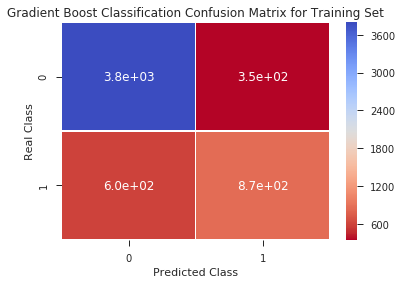

Cross Validation Accuracy Scores: 0.788(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.772(+/- 0.05)


In [94]:
# Print classification report
print(classification_report(Y_train, Y_pred_gbc, target_names=['Churn_No', 'Churn_Yes']))

# Building confusion matrix
conf_matrix_gbc = confusion_matrix(Y_train, Y_pred_gbc)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_gbc, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Gradient Boost Classification Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_gbc = cross_val_score(gbc, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_gbc.mean(), scores_gbc.std()*2))

scores_gbcTest = cross_val_score(gbc, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_gbcTest.mean(), scores_gbcTest.std()*2))

We used GridSearCV to find the best parameters of learning rate, max depth, min samples leaf, max features and fit the model with our training set. We generated good accuracy scores for the training and testing sets, with an 79 % and 77 % accuracy. We can see that the the precission in predicting people staying in the Telco is 86 % which is high, however, the perfromance for predicting if they are leaving wasn't that satisffactory, but mauch better that all the latter models with a precision of 72 %, which is reflected in the F1 score, that calculates the harmoninc mean of precision and recall.

#### Preliminar Conclusion

Overall the performance in terms of accuracy was high for each model, with a mean value of 80% approximately, however, the precision was not that good in all models. We will try to generate better scores applying PCA in the next section.

## Training and testing applying PCA

### PCA

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [96]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(X_train)

In [97]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

In [98]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 52
Reduced number of features: 24


In [99]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y_train)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

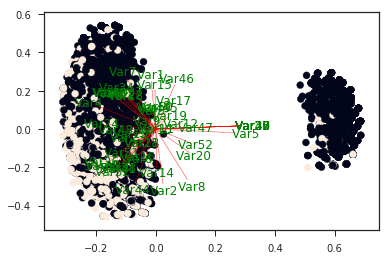

In [100]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

### Fitting PCA on model equal or greater to 79 %

In [101]:
from sklearn.pipeline import Pipeline

#### Logistic Regression (L2)

In [102]:
pipe = Pipeline([('pca', pca), ('logistic', log_reg_model)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [103]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   Churn_No       0.84      0.90      0.87      4146
  Churn_Yes       0.66      0.51      0.58      1479

avg / total       0.79      0.80      0.79      5625

Cross Validation Accuracy Scores: 0.800(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.785(+/- 0.05)


Using the parameters we found in the latter section performing a search with GridSearchCV, and fitting PCA in our model, the accuracy score for the training and test datasets was high, at 80 % and 78 % respectively. However, the performance in the precision was still not that good in predicting if the customer was leaving the company.  

#### Random Forest Classification

In [104]:
pipe = Pipeline([('pca', pca), ('rfc', rfc)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [105]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   Churn_No       0.88      0.89      0.89      4146
  Churn_Yes       0.69      0.67      0.68      1479

avg / total       0.83      0.83      0.83      5625

Cross Validation Accuracy Scores: 0.759(+/- 0.04)
Cross Validation Accuracy Scores - Test Set: 0.740(+/- 0.06)


Using the parameters we found in the latter section performing a search with GridSearchCV, and fitting PCA in our model, the accuracy score for the training and test datasets was high, at 75 % and 73 % respectively. The performance in the precision was much better than without PCA with a precision of 71 % in predicting if the customer was leaving the company.

#### Decision Tree Classification

In [106]:
pipe = Pipeline([('pca', pca), ('clf', clf)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [107]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   Churn_No       0.87      0.91      0.89      4146
  Churn_Yes       0.71      0.61      0.65      1479

avg / total       0.83      0.83      0.83      5625

Cross Validation Accuracy Scores: 0.770(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.749(+/- 0.07)


Using the parameters we found in the latter section performing a search with GridSearchCV, and fitting PCA in our model, the accuracy score for the training and test datasets was high, at 77 % and 74 % respectively. The performance in the precision was much better than without PCA with a precision of 71 % in predicting if the customer was leaving the company.  

#### KNN

In [108]:
pipe = Pipeline([('pca', pca), ('knn', knn_model)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [109]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   Churn_No       0.87      0.90      0.89      4146
  Churn_Yes       0.70      0.62      0.66      1479

avg / total       0.83      0.83      0.83      5625

Cross Validation Accuracy Scores: 0.763(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.748(+/- 0.06)


Using the parameters we found in the latter section performing a search with GridSearchCV, and fitting PCA in our model, the accuracy score for the training and test datasets was high, at 77 % and 75 % respectively. The performance in the precision was much better than without PCA with a precision of 69 % in predicting if the customer was leaving the company.  

#### Ridge

In [110]:
pipe = Pipeline([('pca', pca), ('rclass', rclass)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [111]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   Churn_No       0.83      0.91      0.87      4146
  Churn_Yes       0.67      0.49      0.57      1479

avg / total       0.79      0.80      0.79      5625

Cross Validation Accuracy Scores: 0.801(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.792(+/- 0.05)


Using the parameters we found in the latter section performing a search with GridSearchCV, and fitting PCA in our model, the accuracy score for the training and test datasets was high, at 80 % and 79 % respectively. The performance in the precision was much better than without PCA with a precision of 67 % in predicting if the customer was leaving the company.  

#### Lasso Classification

In [112]:
pipe = Pipeline([('pca', pca), ('lasso', lasso_model)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [113]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   Churn_No       0.84      0.91      0.87      4146
  Churn_Yes       0.66      0.51      0.58      1479

avg / total       0.79      0.80      0.79      5625

Cross Validation Accuracy Scores: 0.801(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.787(+/- 0.06)


Using the parameters we found in the latter section performing a search with GridSearchCV, and fitting PCA in our model, the accuracy score for the training and test datasets was high, at 80 % and 79 % respectively. The performance in the precision was much better than without PCA with a precision of 66 % in predicting if the customer was leaving the company.  

#### SVC Classification

In [114]:
pipe = Pipeline([('pca', pca), ('svc', svc_model)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [115]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   Churn_No       0.94      0.95      0.95      4146
  Churn_Yes       0.86      0.83      0.84      1479

avg / total       0.92      0.92      0.92      5625

Cross Validation Accuracy Scores: 0.759(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.742(+/- 0.04)


Using the parameters we found in the latter section performing a search with GridSearchCV, and fitting PCA in our model, the accuracy score for the training and test datasets was high, at 76 % and 74 % respectively. The performance in the precision was much better than without PCA with a precision of 86 % in predicting if the customer was leaving the company.  

#### Gradient Boost Classification

In [116]:
pipe = Pipeline([('pca', pca), ('gbc', gbc)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [117]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   Churn_No       0.91      0.95      0.93      4146
  Churn_Yes       0.85      0.73      0.79      1479

avg / total       0.89      0.90      0.89      5625

Cross Validation Accuracy Scores: 0.781(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.764(+/- 0.06)


Using the parameters we found in the latter section performing a search with GridSearchCV, and fitting PCA in our model, the accuracy score for the training and test datasets was high, at 78 % and 76 % respectively. The performance in the precision was much better than without PCA with a precision of 85 % in predicting if the customer was leaving the company.  

#### Preliminar Conclusion

Using PCA didn't change much in the accuracy of the score, but it did help quite signifficantly in calculating high precision score. Reducing the number of features from 52 to 24 was great to reduce computational time and thus, make more efficient our models.

## Training and testing applying SelectKBest

In [118]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

/home/mache/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mache/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Logistic Regression (Classification L2)

In [119]:
kbest = SelectKBest(f_classif)
pipe_lr = Pipeline([('kbest', kbest), ('lr', log_reg_model)])
grid_search_k_best = GridSearchCV(pipe_lr, {'kbest__k': [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}, refit=True)
grid_search_k_best.fit(X_train, Y_train)
grid_search_k_best.best_estimator_.steps[-1][1].coef_

pred = grid_search_k_best.predict(X_train)

# Examine the best model
print('Best score', grid_search_k_best.best_score_)
print('Best k-value', grid_search_k_best.best_params_)

# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe_lr, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe_lr, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

Best score 0.7973333333333333
Best k-value {'kbest__k': 20}
             precision    recall  f1-score   support

   Churn_No       0.84      0.90      0.87      4146
  Churn_Yes       0.65      0.51      0.57      1479

avg / total       0.79      0.80      0.79      5625

Cross Validation Accuracy Scores: 0.798(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.788(+/- 0.04)


Applying Selectkbest to our model produce an accuracy score to our training and test sets of 80 % and 79 % respectively. However the precision in predicting if a customer was leaving was that great at 65%.

#### Random Forest Classification

In [120]:
kbest = SelectKBest(f_classif)
pipe_rfc = Pipeline([('kbest', kbest), ('rfc', rfc)])
grid_search_k_best = GridSearchCV(pipe_rfc, {'kbest__k': [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]})
grid_search_k_best.fit(X_train, Y_train)
pred = grid_search_k_best.predict(X_train)

# Examine the best model
print('Best score', grid_search_k_best.best_score_)
print('Best k-value', grid_search_k_best.best_params_)

# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe_rfc, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe_rfc, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

Best score 0.7939555555555555
Best k-value {'kbest__k': 8}
             precision    recall  f1-score   support

   Churn_No       0.85      0.89      0.87      4146
  Churn_Yes       0.64      0.56      0.60      1479

avg / total       0.80      0.80      0.80      5625

Cross Validation Accuracy Scores: 0.793(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.763(+/- 0.04)


Applying Selectkbest to our model produce an accuracy score to our training and test sets of 79 % and 77 % respectively. However the precision in predicting if a customer was leaving was that great at 65%.

#### Decision Tree Classification

In [121]:
kbest = SelectKBest(f_classif)
pipe_clf = Pipeline([('kbest', kbest), ('clf', clf)])
grid_search_k_best = GridSearchCV(pipe_clf, {'kbest__k': [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]})
grid_search_k_best.fit(X_train, Y_train)
pred = grid_search_k_best.predict(X_train)

# Examine the best model
print('Best score', grid_search_k_best.best_score_)
print('Best k-value', grid_search_k_best.best_params_)

# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe_clf, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe_clf, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

Best score 0.7962666666666667
Best k-value {'kbest__k': 8}
             precision    recall  f1-score   support

   Churn_No       0.85      0.89      0.87      4146
  Churn_Yes       0.64      0.56      0.60      1479

avg / total       0.79      0.80      0.80      5625

Cross Validation Accuracy Scores: 0.793(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.769(+/- 0.05)


Applying Selectkbest to our model produce an accuracy score to our training and test sets of 79 % and 77 % respectively. However the precision in predicting if a customer was leaving was that great at 64%.

#### KNN Classification

In [122]:
kbest = SelectKBest(f_classif)
pipe_knn = Pipeline([('kbest', kbest), ('knn', knn_model)])
grid_search_k_best = GridSearchCV(pipe_knn, {'kbest__k': [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]})
grid_search_k_best.fit(X_train, Y_train)
pred = grid_search_k_best.predict(X_train)

# Examine the best model
print('Best score', grid_search_k_best.best_score_)
print('Best k-value', grid_search_k_best.best_params_)

# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe_knn, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe_knn, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

Best score 0.7744
Best k-value {'kbest__k': 17}
             precision    recall  f1-score   support

   Churn_No       0.81      0.90      0.86      4146
  Churn_Yes       0.61      0.43      0.50      1479

avg / total       0.76      0.78      0.76      5625

Cross Validation Accuracy Scores: 0.768(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.758(+/- 0.05)


Applying Selectkbest to our model produce an accuracy score to our training and test sets of 77 % and 76 % respectively. However the precision in predicting if a customer was leaving was that great at 61%.

#### Ridge Classification

In [123]:
kbest = SelectKBest(f_classif)
pipe_rclass = Pipeline([('kbest', kbest), ('rclass', rclass)])
grid_search_k_best = GridSearchCV(pipe_rclass, {'kbest__k': [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]})
grid_search_k_best.fit(X_train, Y_train)
pred = grid_search_k_best.predict(X_train)

# Examine the best model
print('Best score', grid_search_k_best.best_score_)
print('Best k-value', grid_search_k_best.best_params_)

# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe_rclass, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe_rclass, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

Best score 0.7960888888888888
Best k-value {'kbest__k': 20}
             precision    recall  f1-score   support

   Churn_No       0.83      0.92      0.87      4146
  Churn_Yes       0.67      0.48      0.56      1479

avg / total       0.79      0.80      0.79      5625

Cross Validation Accuracy Scores: 0.798(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.783(+/- 0.05)


Applying Selectkbest to our model produce an accuracy score to our training and test sets of 80 % and 79 % respectively. However the precision in predicting if a customer was leaving was that great at 67%.

#### Lasso Classification

In [124]:
kbest = SelectKBest(f_classif)
pipe_lasso = Pipeline([('kbest', kbest), ('lasso_model', lasso_model)])
grid_search_k_best = GridSearchCV(pipe_lasso, {'kbest__k': [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]})
grid_search_k_best.fit(X_train, Y_train)
pred = grid_search_k_best.predict(X_train)

# Examine the best model
print('Best score', grid_search_k_best.best_score_)
print('Best k-value', grid_search_k_best.best_params_)

# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe_lasso, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe_lasso, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

Best score 0.7953777777777777
Best k-value {'kbest__k': 18}
             precision    recall  f1-score   support

   Churn_No       0.84      0.90      0.87      4146
  Churn_Yes       0.65      0.51      0.57      1479

avg / total       0.79      0.80      0.79      5625

Cross Validation Accuracy Scores: 0.799(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.792(+/- 0.04)


Applying Selectkbest to our model produce an accuracy score to our training and test sets of 80 % and 79 % respectively. However the precision in predicting if a customer was leaving was that great at 65%.

#### SVC Classification

In [125]:
kbest = SelectKBest(f_classif)
pipe_svc = Pipeline([('kbest', kbest), ('svc_model', svc_model)])
grid_search_k_best = GridSearchCV(pipe_svc, {'kbest__k': [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]})
grid_search_k_best.fit(X_train, Y_train)
pred = grid_search_k_best.predict(X_train)

# Examine the best model
print('Best score', grid_search_k_best.best_score_)
print('Best k-value', grid_search_k_best.best_params_)

# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe_svc, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe_svc, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

Best score 0.7886222222222222
Best k-value {'kbest__k': 21}
             precision    recall  f1-score   support

   Churn_No       0.82      0.92      0.87      4146
  Churn_Yes       0.66      0.44      0.52      1479

avg / total       0.78      0.79      0.78      5625

Cross Validation Accuracy Scores: 0.789(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.791(+/- 0.05)


Applying Selectkbest to our model produce an accuracy score to our training and test sets of 79 % and 79 % respectively. However the precision in predicting if a customer was leaving was that great at 66%.

#### Gradient Boost Classification

In [126]:
kbest = SelectKBest(f_classif)
pipe_gbc = Pipeline([('kbest', kbest), ('gbc', gbc)])
grid_search_k_best = GridSearchCV(pipe_gbc, {'kbest__k': [1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]})
grid_search_k_best.fit(X_train, Y_train)
pred = grid_search_k_best.predict(X_train)

# Examine the best model
print('Best score', grid_search_k_best.best_score_)
print('Best k-value', grid_search_k_best.best_params_)

# Printing classification report
print(classification_report(Y_train, pred, target_names=['Churn_No', 'Churn_Yes']))

scores = cross_val_score(pipe_gbc, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe_gbc, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

Best score 0.7960888888888888
Best k-value {'kbest__k': 15}
             precision    recall  f1-score   support

   Churn_No       0.84      0.89      0.87      4146
  Churn_Yes       0.65      0.54      0.59      1479

avg / total       0.79      0.80      0.79      5625

Cross Validation Accuracy Scores: 0.796(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.765(+/- 0.05)


Applying Selectkbest to our model produce an accuracy score to our training and test sets of 80 % and 76 % respectively. However the precision in predicting if a customer was leaving was that great at 64%.

#### Preliminar Conclusion

Running our models using SelectKbest did increase very slightly the accuracy scores, but it did not perform that well when calculating the precision scores for people leaving the company. However on the upside, keeping the k highest scoring features reduces the complexity of the models, so it reduces the computational time making them more cost-effective.

## Final model scores

We will now compare the results of each model at once, having used the SelectKbest as tuning.

In [127]:
scoring = 'accuracy'
models = []
models.append(('LR', pipe_lr))
models.append(('KNN', pipe_knn))
models.append(('DT', pipe_clf))
models.append(('RFC', pipe_rfc))
models.append(('RC', pipe_rclass))
models.append(('SVC', pipe_svc))
models.append(('GBC', pipe_gbc))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.798046 (0.012181)
KNN: 0.770674 (0.020960)
DT: 0.793423 (0.012846)
RFC: 0.791116 (0.012370)
RC: 0.797334 (0.012010)
SVC: 0.787377 (0.014606)
GBC: 0.796090 (0.012942)


[]

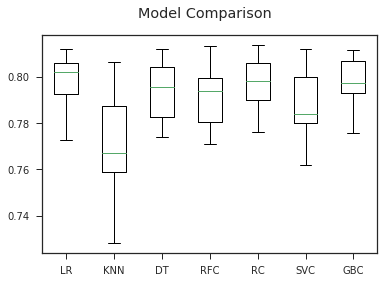

In [128]:
# Comparing Models
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

As you can see from the latter results and plot, Logistic Regression (Classification L2), resulted with the best accuracy score.

In [129]:
# Making Prediction with the chosen model
lr_final = pipe_lr
lr_final.fit(X_train, Y_train)
predictions = lr_final.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.791755508173
[[924  93]
 [200 190]]
             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1017
          1       0.67      0.49      0.56       390

avg / total       0.78      0.79      0.78      1407



In [130]:
# Making predictions on validation dataset
model = pipe_lr
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.791755508173
[[924  93]
 [200 190]]
             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1017
          1       0.67      0.49      0.56       390

avg / total       0.78      0.79      0.78      1407



In [131]:
predictions.shape

(1407,)

The following data frames give us the most important features to predict if the client will leave or not, where the highest ones indicate a strong chance of leaving and the lower ones indicates a high chance of staying:

In [132]:
model_final = LogisticRegression()
model_final.fit(X_train, Y_train)
model_final.coef_.shape
std = np.std(X_train, 0)
std = np.array(std)
std.shape
coefs = std*model_final.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

,importance,labels
43,0.350954,Contract_Month-to-month
23,0.292869,InternetService_Fiber optic
1,0.237136,tenure_low
7,0.148625,TotalCharges_low
50,0.106498,PaymentMethod_Electronic check


,importance,labels
46,-0.141131,PaperlessBilling_No
3,-0.185951,MonthlyCharges_high
0,-0.235333,tenure_high
22,-0.296474,InternetService_DSL
45,-0.369439,Contract_Two year


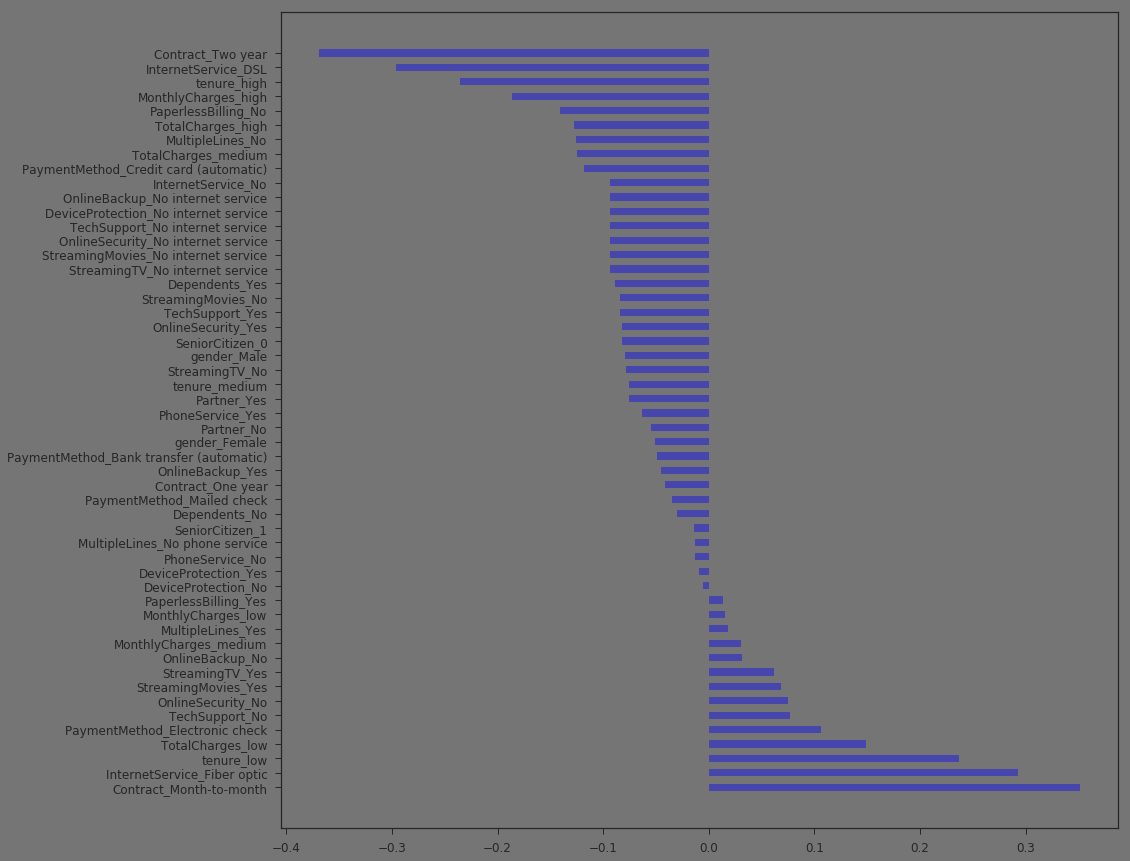

In [176]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15, 15))
plt.subplot('111', axisbg='#757575ff')
fig.set_facecolor('#757575ff')
bar_width = 0.5
plt.xticks(size = 12)
plt.yticks(size = 12)
rects = plt.barh(index, df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])

plt.show()

## Estimation

We define the function that does the kfold probability estimation:

In [134]:
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings('ignore')

def run_prob_cv(X, y, clf_class, **kwargs):
   kf = KFold(len(y), n_folds=5, shuffle=True)
   y_prob = np.zeros((len(y),2))
   for train_index, test_index in kf:
      X_train, X_test = X[train_index], X[test_index]
      y_train = y[train_index]
      clf = clf_class(**kwargs)
      clf.fit(X_train,y_train)
      y_prob[test_index] = clf.predict_proba(X_test)
   return y_prob

We can now predict the probability of churn based on the features. We will also group by the predicted probability in bins of 10% so we know how many clients we have in each bin and the average probability of each bin (in the training dataset).

In [135]:
pred_prob = run_prob_cv(X_train.values,Y_train.values, LogisticRegression)
pred_churn = pred_prob[:,1]
is_churn = Y_train == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

# Calculate true probabilities
true_prob = {}
for prob in counts.index:
 true_prob[prob] = np.mean(is_churn[pred_churn == prob])
 true_prob = pd.Series(true_prob)

# Pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts["probability"] = pd.cut(counts["pred_prob"], bins=np.arange(0,1.1,0.1), labels=["%.2f"%number for number in np.arange(0,1,0.1)])
counts.groupby("probability").agg({'count':['sum'],'pred_prob':['mean'],'true_prob': ['mean']})

,count,pred_prob,true_prob
,sum,mean,mean
probability,,,
0.00,2117,0.038463,0.042192
0.10,833,0.147585,0.137267
0.20,512,0.248014,0.267693
0.30,539,0.349264,0.304379
0.40,463,0.448919,0.443929
0.50,408,0.552887,0.551948
0.60,390,0.647930,0.666568
0.70,304,0.744805,0.721296


We can now filter only the clients with a predicted probability higher than 80%:

In [136]:
result = pd.DataFrame(X_train.values[pred_prob[:,1]>0.8], columns=features)

We can now define a function to return to the original columns:

In [137]:
def undummy(df):
   x=result.stack()
   stacked=pd.DataFrame(x[x!=0].index.get_level_values(1))
   newdata=stacked.loc[[i for j, i in enumerate(stacked.index) if j % 19 == 0]]
   for col in np.arange(1,19):
      newdata=pd.concat([newdata.reset_index(drop=True),stacked.loc[[i for j, i in enumerate(stacked.index) if j % 19 == col]].reset_index(drop=True)],axis=1)
   newdata.columns = [x.partition('_')[0] for x in newdata.loc[0].values]
   newdata = pd.DataFrame([newdata[x] for x in newdata.columns]).T
   return newdata

In [138]:
final = undummy(result)
final.describe().T

,count,unique,top,freq
tenure,59,1,tenure_low,59
MonthlyCharges,59,1,MonthlyCharges_high,59
TotalCharges,59,1,TotalCharges_low,59
gender,59,2,gender_Female,32
SeniorCitizen,59,2,SeniorCitizen_1,42
Partner,59,2,Partner_No,43
Dependents,59,2,Dependents_No,58
PhoneService,59,1,PhoneService_Yes,59
MultipleLines,59,2,MultipleLines_Yes,49
InternetService,59,1,InternetService_Fiber optic,59


## Conclusion

With the numerical and categorical plots we were able to answer which features influence more if the client will leave.

The logistic regression model was the best performing model and it helped us to know which are the most important features to predict if the client will leave. We also defined function that were able to show us the clients with highest chance of leaving.

These results are an important tool when that could help us decide into which clients we should focus our  resources to try to avoid them leaving, and thus saving time and funds.